# 공공 인공지능 Open API 활용

### 독수리 이미지 인식

In [2]:
with open('etriaikey.txt') as kfile:
    etri_key = kfile.read()

In [3]:
import urllib3
import json
import base64
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"

In [4]:
import os
img_file = '../02_CNN/animals/eagle.jpg'
_, image_type = os.path.splitext(img_file)
image_type

'.jpg'

In [5]:
image_type = 'jpg' if image_type == '.jfif' else image_type[1:] 
# jfif 파일은 jpg로 image_type을 설정하고, 아니면 .을 제외한 나머지가 image_type
image_type

'jpg'

In [6]:
with open(img_file, 'rb') as file:
    image_contents = base64.b64encode(file.read()).decode("utf8")

In [7]:
request_json = {
    "access_key": etri_key,
    "argument": {
        "type": image_type,
        "file": image_contents 
    }
}

In [8]:
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(request_json)
)

In [9]:
print("[responseCode] " + str(response.status))  
#  response.status = 200 이면 정상작동을 의미

[responseCode] 200


In [10]:
response.data
# 새 1마리 인식

b'{"result":0,"return_object":{"data":[{"class":"bird","confidence":"0.998719","x":"48","y":"10","width":"188","height":"176"}]}}'

In [11]:
result = json.loads(response.data)
result

{'result': 0,
 'return_object': {'data': [{'class': 'bird',
    'confidence': '0.998719',
    'x': '48',
    'y': '10',
    'width': '188',
    'height': '176'}]}}

In [14]:
obj_list = result['return_object']['data']
obj_list[0]

{'class': 'bird',
 'confidence': '0.998719',
 'x': '48',
 'y': '10',
 'width': '188',
 'height': '176'}

## 시각화

In [12]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
%matplotlib inline

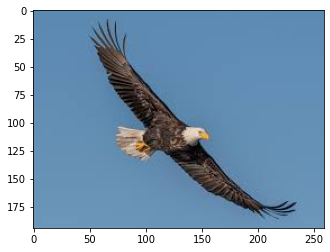

In [13]:
image = Image.open( img_file )
plt.imshow(image)
plt.show()

## - 이미지에 박스 채우기 인식

{'class': 'bird',
 'confidence': '0.998719',
 'x': '48',
 'y': '10',
 'width': '188',
 'height': '176'}

In [20]:
draw = ImageDraw.Draw(image)
obj = obj_list[0]
name = obj['class']
x = int(obj['x'])
y = int(obj['y'])
w = int(obj['width'])
h = int(obj['height'])
draw.text( (x,y), name, font= ImageFont.truetype('malgun.ttf',20), fill = (255,0,0) )
draw.rectangle(((x,y),(x+w, y+h)), outline =(255,0,0),width =2)

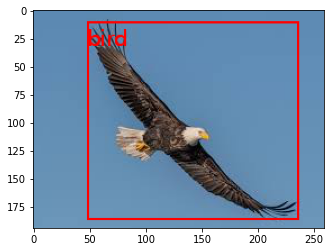

In [21]:
plt.imshow(image)
plt.show()